In [3]:
import pandas as pd 
import csv
import matplotlib.pyplot as plt
from matplotlib import*
from pandas import *
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import corner
from IPython.display import display, Math
import emcee
#from matplotlib import rc
#from pylab import*

In [4]:
Data15=pd.DataFrame(np.loadtxt('SN_data_clean.txt', unpack = False))

SN_data_sim1= pd.read_csv('1SN_data_sim1.csv')
dm_prep=SN_data_sim1['mb1']-SN_data_sim1['m_th']
prep15=Data15[5]-Data15[1]
def dm_cut(df,start,end):
    return df.loc[start:end]

signal_15 = np.matrix(np.loadtxt('cleaned_1500_11.dat.txt', unpack = False))#1500x1500
dm15 = np.matrix(dm_cut(prep15,0,1499))
dmC3=np.matrix(dm_cut(prep15,0,628))

In [5]:
def replaceDiag(matrix, replacementList):
    cp=matrix.copy()
    for i in range(len(replacementList)):
        cp[i,i] = 1/np.sqrt(replacementList[i,0])
    return cp

In [6]:
size=629
I=np.matrix(np.identity(size))
Q=np.matrix(np.loadtxt('n.txt', unpack = False))
N=replaceDiag(I,Q)
def lnlike(theta,dm,signal,size):
    sigma,A,M= theta
    #I=np.matrix(np.identity(size))
    s2=sigma**2
    C=A*signal+s2*N
    #T1=((A*signal)/s2)
    #T2=((A*signal)/s2)**2
    inv_C=np.linalg.inv(C)
    # print(N)
    detC=np.linalg.slogdet(C)
    Dm=dm+np.matrix(M*np.ones(size))
    #print(np.matmul(inv_C,np.transpose(Dm)).shape)
    #print(.5*np.matmul(np.transpose(Dm),np.matmul(inv_C,Dm)))
    return ((-.5*detC[1])-(.5*np.matmul(Dm,np.matmul(inv_C,np.transpose(Dm)))))[0,0]

In [7]:

SCut3=signal_15[:629,:629]


In [8]:
def lnprior(theta):#Prior
    sigma,A,M= theta
    if .005 < sigma < 0.3 and 0< A < 5 and -1 < M < 1:
        return 0.0
    return -np.inf

def lnprob(theta,dm,signal,size):  #prob
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta,dmC3,SCut3,size)

In [9]:
ndim, nwalkers = 3, 50
pos = [[.08,.5,0] + [1e-3]*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(dmC3,SCut3,629))

In [10]:
k=sampler.run_mcmc(pos,800)

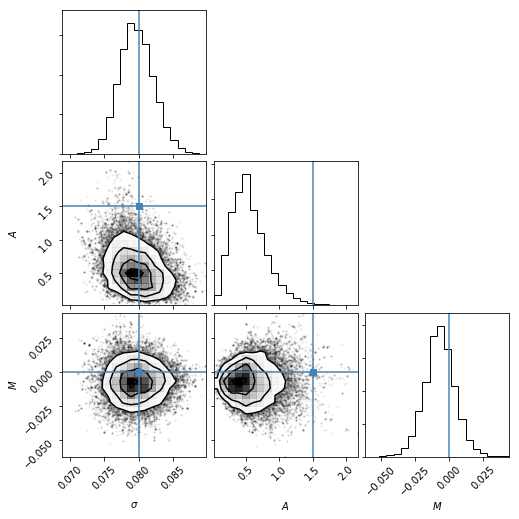

In [11]:
samples = sampler.chain[:, 10:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$\sigma$", "$A$", "$M$"],
                      truths=[.08, 1.5, 0])
#plt.savefig('corner4.png')

In [12]:
labels = ["\sigma", "A", "M"]

for i in range(ndim):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.4f}_{{-{1:.8f}}}^{{{2:.8f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

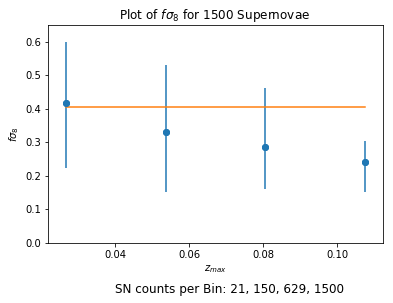

In [58]:
f=[0.40404193, 0.40404193, 0.40404193, 0.40404193]

#f=[f[3], f[2], f[1], f[0]]
 
A=[1.065, .6751, 0.5008, 0.3583]
upper_A=[.94007,.80413,.620049,.18563]

lower_A=[-.9843,-.7391,-0.44131,-.2719]
f_max=f.copy()
f_min=f.copy()
for i in range(len(A)):
    f_max[i]=1/2*1/np.sqrt(A[i])*f[i]*upper_A[i]
    f_min[i]=1/2*1/np.sqrt(A[i])*f[i]*lower_A[i]
zmax=0.107302


new_f=f.copy()  
for i in range(len(f)):
    new_f[i]=f[i]*np.sqrt(A[i])
plt.figure()
xaxis=[zmax/4, zmax/2, zmax*0.75, zmax]
#txt="Bin size: $Bin_1=21, Bin_2=150,Bin_3=650,Bin_4=1500$"
plt.errorbar( xaxis,new_f,yerr=[np.abs(f_min),f_max],fmt='o')
plt.plot(xaxis,[0.40404193,0.40404193,0.40404193 ,0.40404193 ] )
plt.scatter(xaxis,new_f)
plt.ylim(0,.65)
plt.xlabel(r'$z_{max}$')
plt.ylabel("$f\sigma_8$")
plt.text(0.04, -.15, r'SN counts per Bin: 21, 150, 629, 1500 ',fontsize=12)
plt.title("Plot of $f\sigma_8$ for 1500 Supernovae ")

# la=['z=0.027','z=0.054','z=0.08','z=0.107']
# for l, x, y in zip(la, xaxis, new_f):
#     plt.annotate(
#         l,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='top',
#         bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.4),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0.2'))

plt.savefig('fplot6.png')
plt.show()



In [116]:
f=[0.40404193, 0.40404193, 0.40404193, 0.40404193]

#f=[f[3], f[2], f[1], f[0]]
 
A=[0.8824, 0.6909, 0.5491, 0.4099]
upper_A=[1.53843075,0.47751773,0.28429159,0.19125760]

lower_A=[-0.58489654,-0.33645313,-0.23020304,-0.16914946]
f_max=f.copy()
f_min=f.copy()
for i in range(len(A)):
    f_max[i]=1/2*1/np.sqrt(A[i])*f[i]*upper_A[i]
    f_min[i]=1/2*1/np.sqrt(A[i])*f[i]*lower_A[i]
zmax=0.107302


new_f=f.copy()  
for i in range(len(f)):
    new_f[i]=f[i]*np.sqrt(A[i])

xaxis=[zmax/4, zmax/2, zmax*0.75, zmax]
txt="Bin size: $Bin_1=21, Bin_2=150,Bin_3=650,Bin_4=1500$"
#plt.errorbar( xaxis,new_f,yerr=[np.abs(f_min),f_max],fmt='o')
#plt.scatter(xaxis,new_f)
fig=plt.figure()
ax1 = fig.add_axes((0.1,0.4,0.8,0.5))
ax1.set_title("Plot of $f\sigma_8$ for 1500 Supernova ")
ax1.set_xlabel(r'$\begin{center}$ z \\*\textit{\small{' + txt + r'}}\end{center}')
ax1.set_ylabel('$f\sigma_8$')
ax1.scatter(xaxis,new_f)
ax1.errorbar( xaxis,new_f,yerr=[np.abs(f_min),f_max],fmt='o')
plt.show()
# plt.xlabel("z")
# plt.ylabel("$f\sigma_8$")
# plt.title("Plot of $f\sigma_8$ for 1500 Supernova ")
#plt.legend(['$Bin_1$', '$Bin_2$', '$Bin_3$', '$Bin_4$'],shadow=True, loc=(0.08, .63))
#fig.text(.5, .0, txt, ha='center')

#plt.savefig('fplot.png')



ValueError: 
\begin{center}
^
Unknown symbol: \begin (at char 0), (line:1, col:1)

<Figure size 432x288 with 1 Axes>

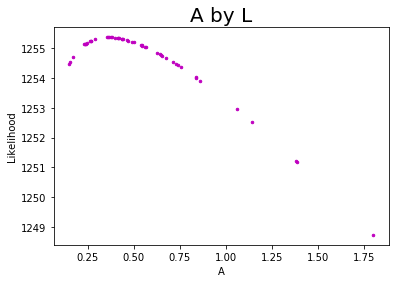

In [136]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step
A=k[0][:,1]
a=[]
for i in A:
    like=lnlike([.0797,i,-.0071],dmC3,SCut3,629)
    a.append(like)
plt.plot(A,a,'m.',markersize=5)
plt.xlabel('A')
plt.ylabel('Likelihood')
plt.title('A by L', fontsize=20)
#plt.savefig('First 208Galaxy Location(b,l).png')
plt.show()

In [138]:
z=np.poly1d(np.polyfit(A,a,4))
B=np.arange(0.1,1.75,.01)

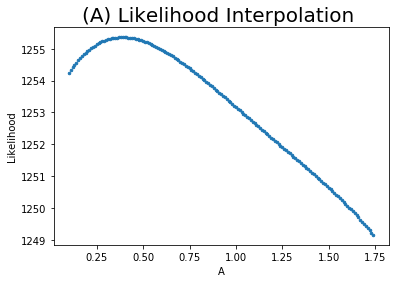

In [139]:
plt.plot(B,z(B),'.',markersize=5)
plt.xlabel('A')
plt.ylabel('Likelihood')
plt.title('(A) Likelihood Interpolation ', fontsize=20)
#plt.savefig('First 208Galaxy Location(b,l).png')
plt.show()

In [140]:
import scipy.integrate as integrate
Atot=integrate.quad(lambda x: z(x), .1,1.75)
print(Atot[0]*.68)

1405.9878368586342


In [141]:
print(Atot[0])

2067.6291718509324


In [169]:
integrate.quad(lambda x: z(x), 0,1.120849)

(1405.9826285463953, 1.560954286435207e-11)

In [170]:
1.120849-0.5008 #upper

0.620049

In [172]:
print(Atot[0]*.34)

702.9939184293171


In [213]:
integrate.quad(lambda x: z(x), -.05949,.5008)

(702.9438991225104, 7.804245018255944e-12)

In [214]:
.5008-.05949 #lower

0.44131000000000004

In [2]:
xaxis

NameError: name 'xaxis' is not defined